# CREDIT CARD FRAUD DETECTION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
file=pd.read_csv("creditcard.csv")

In [ ]:
file.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
file.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,...,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75357.000000,75356.000000,75356.000000,75356.000000,75356.000000
mean,36110.239845,-0.252779,-0.028574,0.678975,0.166227,-0.274493,0.097547,-0.114049,0.054618,0.003693,...,-0.029030,-0.105362,-0.038348,0.007033,0.135245,0.024984,0.002408,0.003170,97.386784,0.002428
std,14826.849221,1.877372,1.660941,1.402475,1.370891,1.387110,1.305219,1.253220,1.233482,1.151622,...,0.735801,0.636560,0.620647,0.596267,0.439933,0.498227,0.388885,0.325915,271.107132,0.049220
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,29808.000000,-1.014563,-0.595725,0.190522,-0.725740,-0.891744,-0.640664,-0.604835,-0.141745,-0.678360,...,-0.225114,-0.524347,-0.178518,-0.324097,-0.128460,-0.327494,-0.063013,-0.005684,7.680000,0.000000
50%,39061.000000,-0.246462,0.070645,0.766814,0.185626,-0.306681,-0.153060,-0.073692,0.067915,-0.080156,...,-0.059348,-0.079669,-0.050641,0.063602,0.173419,-0.073581,0.009421,0.022871,26.690000,0.000000
75%,47465.000000,1.153590,0.724071,1.398870,1.049550,0.263561,0.491405,0.418052,0.346752,0.644633,...,0.116887,0.309364,0.080096,0.404425,0.422121,0.305705,0.082473,0.075966,88.982500,0.000000
max,56021.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
file.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
file['Class'].value_counts()

0.0    75173
1.0      183
Name: Class, dtype: int64

In [ ]:
normal=file[file.Class==0]

In [ ]:
fraud=file[file.Class==1]

In [ ]:
print(normal.shape)

(75173, 31)


In [ ]:
normal.Amount.describe()

count    75173.000000
mean        97.392540
std        271.227608
min          0.000000
25%          7.690000
50%         26.760000
75%         88.960000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     183.000000
mean       95.022350
std       216.587987
min         0.000000
25%         1.000000
50%         7.580000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,36121.478576,-0.236877,-0.040266,0.702575,0.153816,-0.263103,0.102849,-0.097068,0.046812,0.011383,...,0.043148,-0.031060,-0.105166,-0.037869,0.007250,0.134982,0.024809,0.000981,0.003060,97.39254
1.0,31384.775956,-6.777088,4.776050,-9.019596,5.264634,-4.957996,-2.081116,-7.090161,3.259605,-3.145232,...,0.384354,0.806585,-0.183346,-0.235990,-0.080063,0.242355,0.098315,0.588353,0.048511,95.02235


In [ ]:
normal_sample=normal.sample(n=492)

In [ ]:
new_file=pd.concat([normal_sample,fraud],axis=0)

In [ ]:
new_file.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
61206,49707,-2.310457,-1.250621,2.248986,1.820499,2.383454,-1.216252,-1.048118,0.440689,-0.614441,...,0.300683,-0.004159,-0.011612,-0.527450,0.582046,0.082147,-0.064433,0.103901,10.62,0.0
19433,30282,0.719720,-1.070450,0.845172,0.054157,-0.568933,1.863785,-1.015146,0.798405,0.800702,...,0.314343,0.797333,-0.023431,-0.952887,-0.225405,1.209126,-0.002663,0.012269,149.00,0.0
19428,30275,-0.208831,1.031611,1.692659,0.919155,0.358271,-0.559306,1.017717,-0.360458,-0.761509,...,0.187065,0.859743,-0.123601,0.661794,-0.380801,-0.371477,0.035647,-0.053419,6.81,0.0
37884,39152,0.980331,-1.418406,0.695934,-0.452511,-1.520203,-0.100196,-0.838894,-0.044245,-0.167785,...,0.408733,0.795765,-0.365444,-0.062023,0.468260,-0.038248,0.012156,0.058829,225.00,0.0
47891,43405,1.096543,-0.140866,1.454049,0.932591,-1.089886,-0.115988,-0.630440,0.129060,0.761998,...,-0.017908,0.210063,0.114423,0.678339,0.138445,0.310017,0.039118,0.031583,11.50,0.0
43319,41461,-0.983922,-0.069057,1.231968,-0.458404,-2.050263,0.624922,-0.864851,-2.637247,1.508245,...,-1.129872,1.208165,-0.716660,0.528736,-0.492845,0.362296,0.360357,0.138259,305.05,0.0
6570,7981,-0.167019,1.167373,1.234836,0.839094,0.783039,-0.218778,0.896960,-0.467425,0.860741,...,-0.082749,0.218364,-0.290327,-0.505503,-0.197617,-0.362482,-0.148463,-0.077209,2.61,0.0
43423,41502,0.728771,-0.721387,-0.420717,0.250820,-0.512514,-1.108315,0.702194,-0.332265,-0.446998,...,0.184686,-0.114194,-0.316756,0.643659,0.389988,1.010539,-0.169980,0.031176,285.00,0.0
27118,34398,1.215507,0.067170,0.736541,0.631151,-0.825871,-1.089011,-0.000805,-0.217199,0.443473,...,-0.201180,-0.362128,0.083035,0.980089,0.355214,0.467900,-0.034925,0.014946,4.00,0.0
45140,42220,0.831349,-0.728900,-1.413328,0.446592,1.965930,3.687315,-0.142394,0.791121,0.146121,...,-0.047946,-0.598827,-0.323686,1.021351,0.811104,-0.350476,-0.016909,0.051391,232.00,0.0


In [ ]:
new_file['Class'].value_counts()

0.0    492
1.0    183
Name: Class, dtype: int64

In [ ]:
new_file.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,36570.071138,-0.161525,-0.165891,0.683006,0.083776,-0.249107,0.055153,-0.169385,0.109780,0.073723,...,0.034759,-0.041587,-0.087290,-0.050069,0.027993,0.139449,0.031865,0.005261,0.005853,97.356687
1.0,31384.775956,-6.777088,4.776050,-9.019596,5.264634,-4.957996,-2.081116,-7.090161,3.259605,-3.145232,...,0.384354,0.806585,-0.183346,-0.235990,-0.080063,0.242355,0.098315,0.588353,0.048511,95.022350


In [ ]:
x=new_file.drop(columns='Class',axis=1)

In [ ]:
y=new_file['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_predict=model.predict(x_train)

In [ ]:
training_data_accuracy=accuracy_score(x_train_predict,y_train)*100

In [ ]:
print(f"Training data accuracy: {training_data_accuracy}%")

Training data accuracy: 97.4074074074074%


In [ ]:
x_test_predict=model.predict(x_test)

In [ ]:
test_data_accuracy=accuracy_score(x_test_predict,y_test)*100

In [ ]:
print(f"Test Data Accuracy: {test_data_accuracy} %")

Test Data Accuracy: 95.55555555555556 %


# IRIS CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris_flower = pd.read_csv("IRIS.csv")

In [ ]:
iris_flower.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_flower.shape

(150, 5)

In [ ]:
iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_flower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

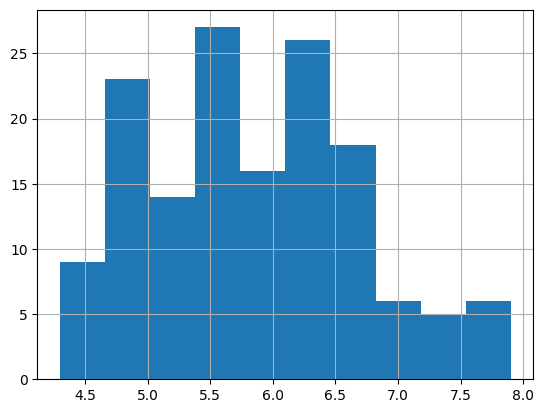

In [ ]:
iris_flower['sepal_length'].hist()

<Axes: >

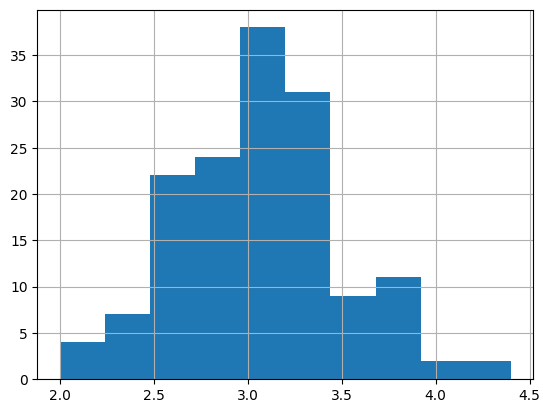

In [ ]:
iris_flower['sepal_width'].hist()

<Axes: >

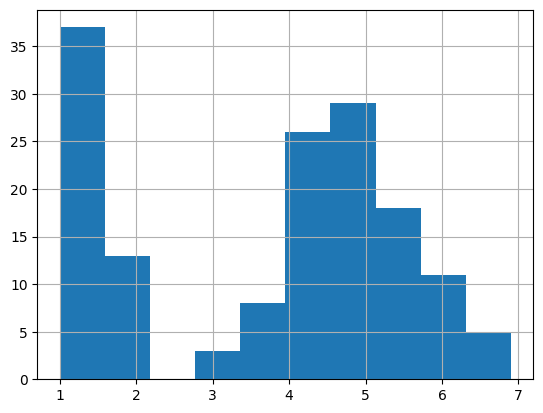

In [ ]:
iris_flower['petal_length'].hist()

<Axes: >

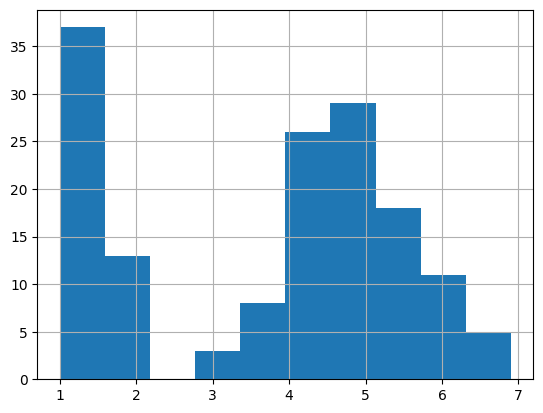

In [ ]:
iris_flower['petal_length'].hist()

In [ ]:
colors=['red','Black','teal']

In [ ]:
species=['Iris-Setosa','Iris-versicolor','Iris-Virginica']

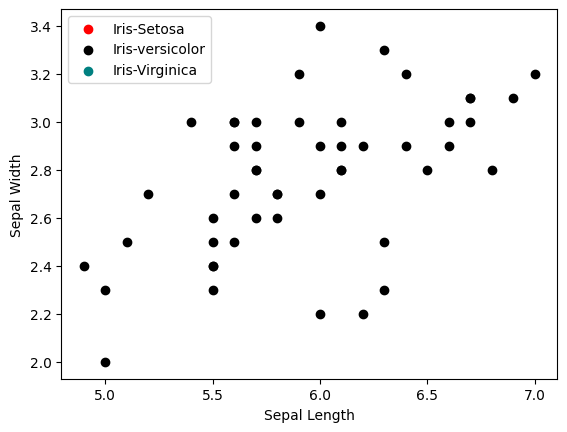

In [ ]:
for i in range(3):
  x=iris_flower[iris_flower['species']==species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

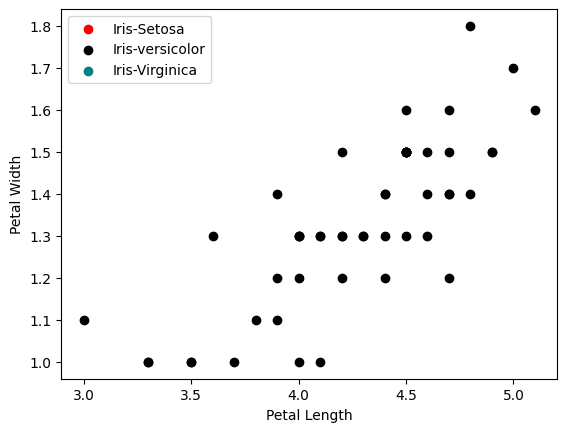

In [ ]:
for i in range(3):
  x=iris_flower[iris_flower['species']==species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

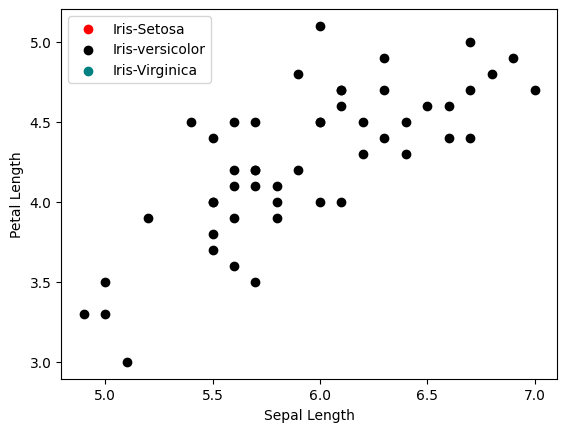

In [ ]:
for i in range(3):
  x=iris_flower[iris_flower['species']==species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

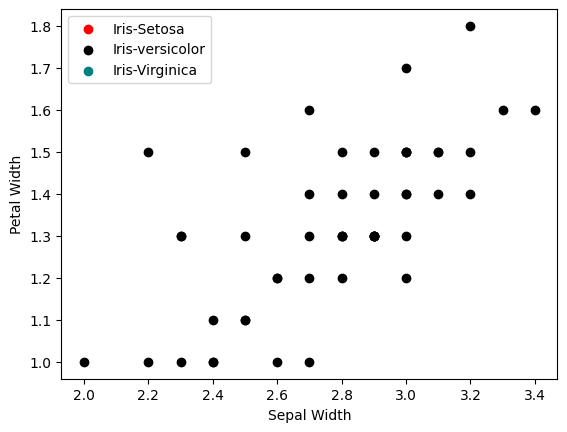

In [ ]:
for i in range(3):
  x=iris_flower[iris_flower['species']==species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

<Axes: >

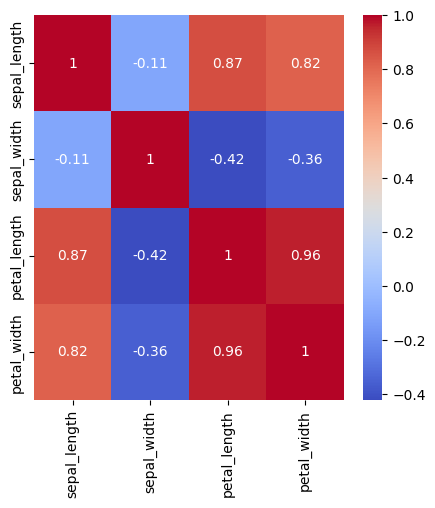

In [ ]:
numeric_columns=iris_flower.drop(columns='species')
corr=numeric_columns.corr()
fig,axis=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

In [ ]:
le=LabelEncoder()

In [ ]:
iris_flower['species']=le.fit_transform(iris_flower['species'])

In [ ]:
iris_flower.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
x=iris_flower.drop(columns='species')

In [ ]:
y=iris_flower['species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
LR_accuracy=LR.score(x_test,y_test)*100
KNN_accuracy=KNN.score(x_test,y_test)*100
DT_accuracy=DT.score(x_test,y_test)*100

In [ ]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")


Accuracy by using Logistic Regression: 97.77777777777777%


In [ ]:
print(f"Accuracy by using K NEighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K NEighbors Algorithm: 97.77777777777777%


In [ ]:
print(f"Accuracy by usin Decision Tree Algorithm: {DT_accuracy}%")

Accuracy by usin Decision Tree Algorithm: 97.77777777777777%


# SALES PREDICTION USING PYTHON

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
data_file=pd.read_csv("advertising.csv")

In [ ]:
data_file.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
data_file.shape

(200, 4)

In [ ]:
data_file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data_file.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
sns.set()

<Axes: >

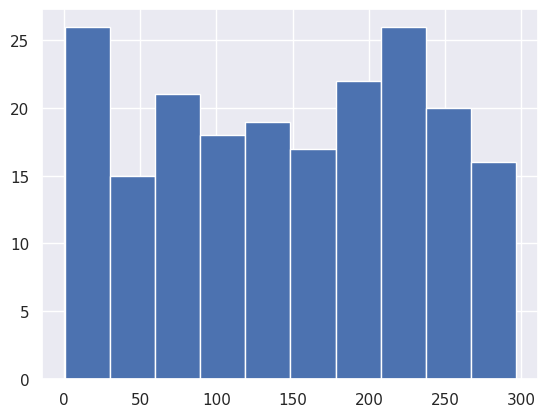

In [ ]:
data_file['TV'].hist()

<Axes: >

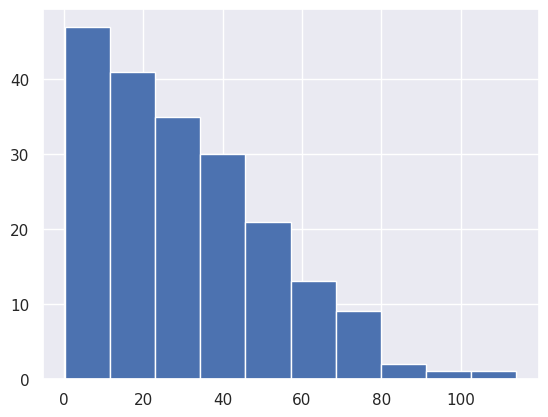

In [ ]:
data_file['Newspaper'].hist()

<Axes: >

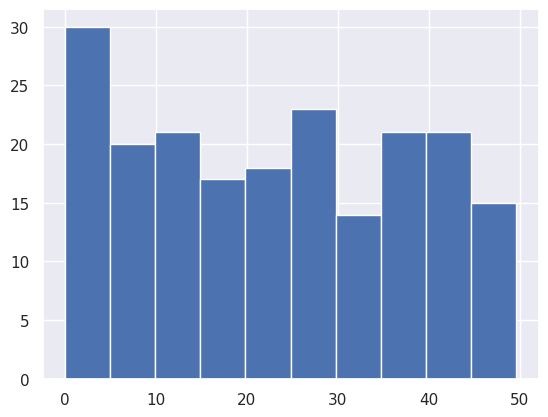

In [ ]:
data_file['Radio'].hist()

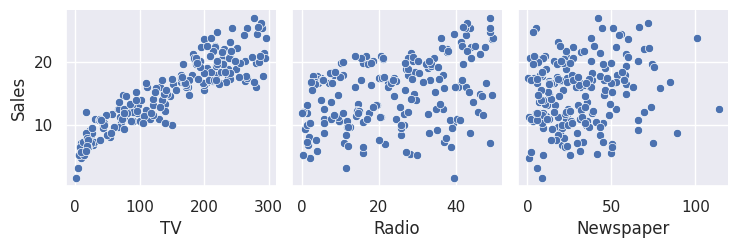

In [ ]:
sns.pairplot(data_file,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')

<Axes: >

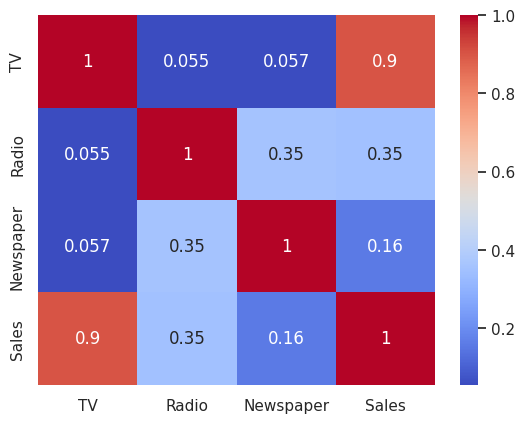

In [ ]:
sns.heatmap(data_file.corr(),annot=True,cmap='coolwarm')

In [ ]:
x=data_file.drop(columns='Sales')

In [ ]:
y=data_file['Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test)

In [ ]:
prediction

array([17.94221632, 11.28731032, 19.36406753, 15.25309499,  8.85035488,
       11.08345095, 24.54827272, 10.72184726, 18.64190205, 17.03877174,
       14.71887065, 13.30204368, 19.10529921, 11.4654086 , 13.82417942,
       14.56139355, 16.86156735, 17.27369971, 17.78634747, 21.28201581,
       19.1397699 , 11.05346066,  9.93276334, 11.49854807,  8.5309559 ,
       13.26073545, 21.75566382, 16.96066432, 24.25791572, 11.92392893,
       16.40376866, 21.96064207,  9.51770237, 10.16209996, 10.08141197,
       10.45644324, 15.54919097,  9.92133897, 13.83425453, 12.54320065,
       14.5093965 , 12.61758414,  6.46804914, 20.25656292, 23.16303373,
       24.65508581, 15.20817964,  9.27513655, 18.72004324, 18.16217728,
       12.73063894, 16.65175796, 15.79776032,  8.36188762, 21.22771856,
        9.52094834, 23.88078008, 23.29062902, 19.6930198 , 16.76467522])

In [ ]:
model.intercept_


5.022730805826269

In [ ]:
model.coef_

array([ 0.05223455,  0.10672463, -0.00120158])

In [ ]:
accuracy_score=model.score(x_test,y_test)*100

In [ ]:
print(f"Accuracy of model : {accuracy_score}%")

Accuracy of model : 88.77675297095176%
